# Proyecto final Minería de datos estructurados

## 1. Preparación de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Integración de los datos

No es necesario realizar una integración de los datos ya que se encuentran todos en un mismo archivo estructurado.

In [2]:
#Lectura de datos
df= pd.read_csv("/work/Desersión.csv",sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
print(df['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


Configuración de variable objetivo 'Target' con dos posibilidades: desertó o no desertó

In [5]:
df.loc[df['Target'] == 'Dropout', 'Target'] = 'Desertó'
df.loc[df['Target'] == 'Enrolled', 'Target'] = 'No desertó'
df.loc[df['Target'] == 'Graduate', 'Target'] = 'No desertó'
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Desertó
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,No desertó
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Desertó
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,No desertó
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,No desertó


In [6]:
print(df['Target'].unique())

['Desertó' 'No desertó']


Corrección del tipo de dato de la variable objetivo, es la única variable categórica del dataset

In [7]:
df['Target']=df['Target'].astype('category')

A continuación se realiza un mapeo de los valores de las variables numéricas que representan categorías

In [8]:
marital_status_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'FactoUnion',
    6: 'Separated'
}

df['Marital status'] = df['Marital status'].map(marital_status_map)

In [9]:
def agrupar_admision(codigo):
    if codigo in [1, 17, 18]:
        return 'Admisión Regular'
    elif codigo in [5, 16]:
        return 'Admisión Especial'
    elif codigo in [2, 10, 26, 27]:
        return 'Admisión por Ordenanza'
    elif codigo in [15, 57]:
        return 'Estudiantes Internacionales'
    elif codigo in [42, 43, 51]:
        return 'Cambios/Transferencias'
    elif codigo in [7, 44, 53]:
        return 'Titulados/Diplomados'
    elif codigo == 39:
        return 'Mayores de 23 años'
    else:
        return 'Otros'

df['Application mode'] = df['Application mode'].apply(agrupar_admision)

In [10]:
qualification_groups_simple = {
    'Secondary Education': [1, 9, 10, 12, 14, 15, 19, 38],
    'Technical Education': [39, 42],
    'Higher Education': [2, 3, 4, 5, 40, 43],  # Todos los niveles superiores juntos
    'Other': [6]
}

def map_qualification_simple(value):
    for group, codes in qualification_groups_simple.items():
        if value in codes:
            return group
    return 'Unknown'

df['Previous qualification'] = df['Previous qualification'].apply(map_qualification_simple)

In [11]:
def group_mothers_qualification(code):
    # Educación Básica (incluye primaria/secundaria incompleta y casos de alfabetización)
    if code in [1, 37, 19, 38, 9, 10, 11, 12, 14, 18, 22, 26, 27, 29, 30, 35, 36]:
        return 'Basic_or_Secondary'
    
    # Educación Superior (Grados universitarios)
    elif code in [2, 3, 40, 41]:
        return 'Higher_Education'
    
    # Posgrados (Maestrías/Doctorados)
    elif code in [4, 5, 43, 44]:
        return 'Postgraduate'
    
    # Formación Técnica/Profesional
    elif code in [39, 42]:
        return 'Technical_Education'
    
    # Casos especiales (desconocido/incompleto)
    else:
        return 'Other_or_Unknown'

In [12]:
df['Mother\'s qualification'] = df["Mother's qualification"].apply(group_mothers_qualification)

In [13]:
df['Father\'s qualification'] = df["Father's qualification"].apply(group_mothers_qualification)

In [14]:
# Diccionario de agrupación
occupation_map = {
    0: 'Special Cases',
    1: 'Professionals',
    2: 'Professionals',
    3: 'Technicians/Associate Professionals',
    4: 'Administrative/Clerical',
    5: 'Special Cases',
    6: 'Skilled Manual Workers',
    7: 'Skilled Manual Workers',
    8: 'Skilled Manual Workers',
    9: 'Unskilled Workers',
    10: 'Special Cases',
    90: 'Special Cases',
    99: 'Special Cases',
    122: 'Professionals',
    123: 'Professionals',
    125: 'Professionals',
    131: 'Technicians/Associate Professionals',
    132: 'Technicians/Associate Professionals',
    134: 'Technicians/Associate Professionals',
    141: 'Administrative/Clerical',
    143: 'Administrative/Clerical',
    144: 'Administrative/Clerical',
    151: 'Special Cases',
    152: 'Special Cases',
    153: 'Special Cases',
    171: 'Skilled Manual Workers',
    173: 'Skilled Manual Workers',
    175: 'Skilled Manual Workers',
    191: 'Unskilled Workers',
    192: 'Unskilled Workers',
    193: 'Unskilled Workers',
    194: 'Unskilled Workers'
}

# Aplicar mapeo al DataFrame
df['Mother\'s occupation'] = df["Mother's occupation"].map(occupation_map)

In [15]:
father_occupation_map = {
    0: 'Special Cases',
    1: 'Professionals',  
    2: 'Professionals',  
    3: 'Technicians/Associate Professionals',  
    4: 'Administrative/Clerical',  
    5: 'Special Cases',  
    6: 'Skilled Manual Workers',  
    7: 'Skilled Manual Workers',  
    8: 'Skilled Manual Workers',  
    9: 'Unskilled Workers',  
    10: 'Special Cases',  
    90: 'Special Cases',  
    99: 'Special Cases',  
    
    # Profesionales (detalles adicionales)
    101: 'Professionals',  # Armed Forces Officers
    102: 'Professionals',  # Armed Forces Sergeants
    112: 'Professionals',  # Directores administrativos
    114: 'Professionals',  # Directores de servicios
    121: 'Professionals',  # Ciencias físicas/ingeniería
    122: 'Professionals',  # Salud
    123: 'Professionals',  # Profesores
    124: 'Professionals',  # Finanzas/administración
    
    # Técnicos
    131: 'Technicians/Associate Professionals',  # Técnicos científicos/ingeniería
    132: 'Technicians/Associate Professionals',  # Técnicos de salud
    134: 'Technicians/Associate Professionals',  # Servicios legales/sociales
    135: 'Technicians/Associate Professionals',  # Tecnologías información
    
    # Administrativos
    141: 'Administrative/Clerical',  # Oficinistas/secretarías
    143: 'Administrative/Clerical',  # Operadores datos/finanzas
    144: 'Administrative/Clerical',  # Apoyo administrativo
    
    # Casos especiales (servicios/seguridad)
    151: 'Special Cases',  # Servicios personales
    152: 'Special Cases',  # Vendedores
    153: 'Special Cases',  # Cuidado personal
    154: 'Special Cases',  # Seguridad/protección
    
    # Trabajadores manuales calificados
    161: 'Skilled Manual Workers',  # Agricultura calificada
    163: 'Skilled Manual Workers',  # Agricultura de subsistencia
    171: 'Skilled Manual Workers',  # Construcción
    172: 'Skilled Manual Workers',  # Metalurgia
    174: 'Skilled Manual Workers',  # Electricidad/electrónica
    175: 'Skilled Manual Workers',  # Industria alimenticia/artesanía
    181: 'Skilled Manual Workers',  # Operadores maquinaria
    182: 'Skilled Manual Workers',  # Montadores
    183: 'Skilled Manual Workers',  # Conductores
    
    # Trabajadores no calificados
    192: 'Unskilled Workers',  # Agricultura no calificada
    193: 'Unskilled Workers',  # Industria/construcción
    194: 'Unskilled Workers',  # Ayudantes comida
    195: 'Unskilled Workers',  # Vendedores callejeros
    
    # Fuerzas Armadas (pueden ser 'Professionals' o 'Special Cases')
    103: 'Professionals'  # Otro personal militar
}
df['Father\'s occupation'] = df['Father\'s occupation'].map(father_occupation_map)

In [16]:
mapeo_nacionalidad = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldovan',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}
df['Nacionality'] = df['Nacionality'].map(mapeo_nacionalidad)

In [17]:
# Nuevo mapeo por categorías generales
course_group_mapping = {
    33: "Engineering & Technology",
    9119: "Engineering & Technology",
    
    9003: "Agricultural & Environmental Sciences",
    9130: "Agricultural & Environmental Sciences",
    
    9085: "Health Sciences",
    9500: "Health Sciences",
    9556: "Health Sciences",
    
    171: "Arts & Design",
    9070: "Arts & Design",
    9670: "Arts & Design",
    
    9773: "Communication & Media",
    9070: "Communication & Media",  
    
    9147: "Business & Management",
    9991: "Business & Management",
    
    9254: "Social Sciences",
    9238: "Social Sciences",
    8014: "Social Sciences",
    
    9853: "Education",
}
# Aplicar el nuevo mapeo
df['Course'] = df['Course'].map(course_group_mapping)

In [18]:
# Corrección de tipo de datos sin perder columnas
categorical_columns = [
    'Marital status',
    'Application mode',
    'Previous qualification',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Nacionality",
    "Father\'s occupation",
    "Course"
]

df[categorical_columns] = df[categorical_columns].astype('category')

### 1.2 Eliminar variables irrelevantes y redundantes

No se realiza borrado de variables no relevantes, mediante una primera evaluación se llega a que todas las variables predictoras iniciales pueden contribuir a la predicción de la variable objetivo

### 1.3 Descripción estadística

In [19]:
df.describe()

,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,0.890823,132.613314,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1.313793,0.311897,13.188332,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,0.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,125.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,1.000000,133.100000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,2.000000,1.000000,140.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,9.000000,1.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


No se hallan nulos en los datos

In [20]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

/tmp/ipykernel_40/2778628783.py:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/root/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


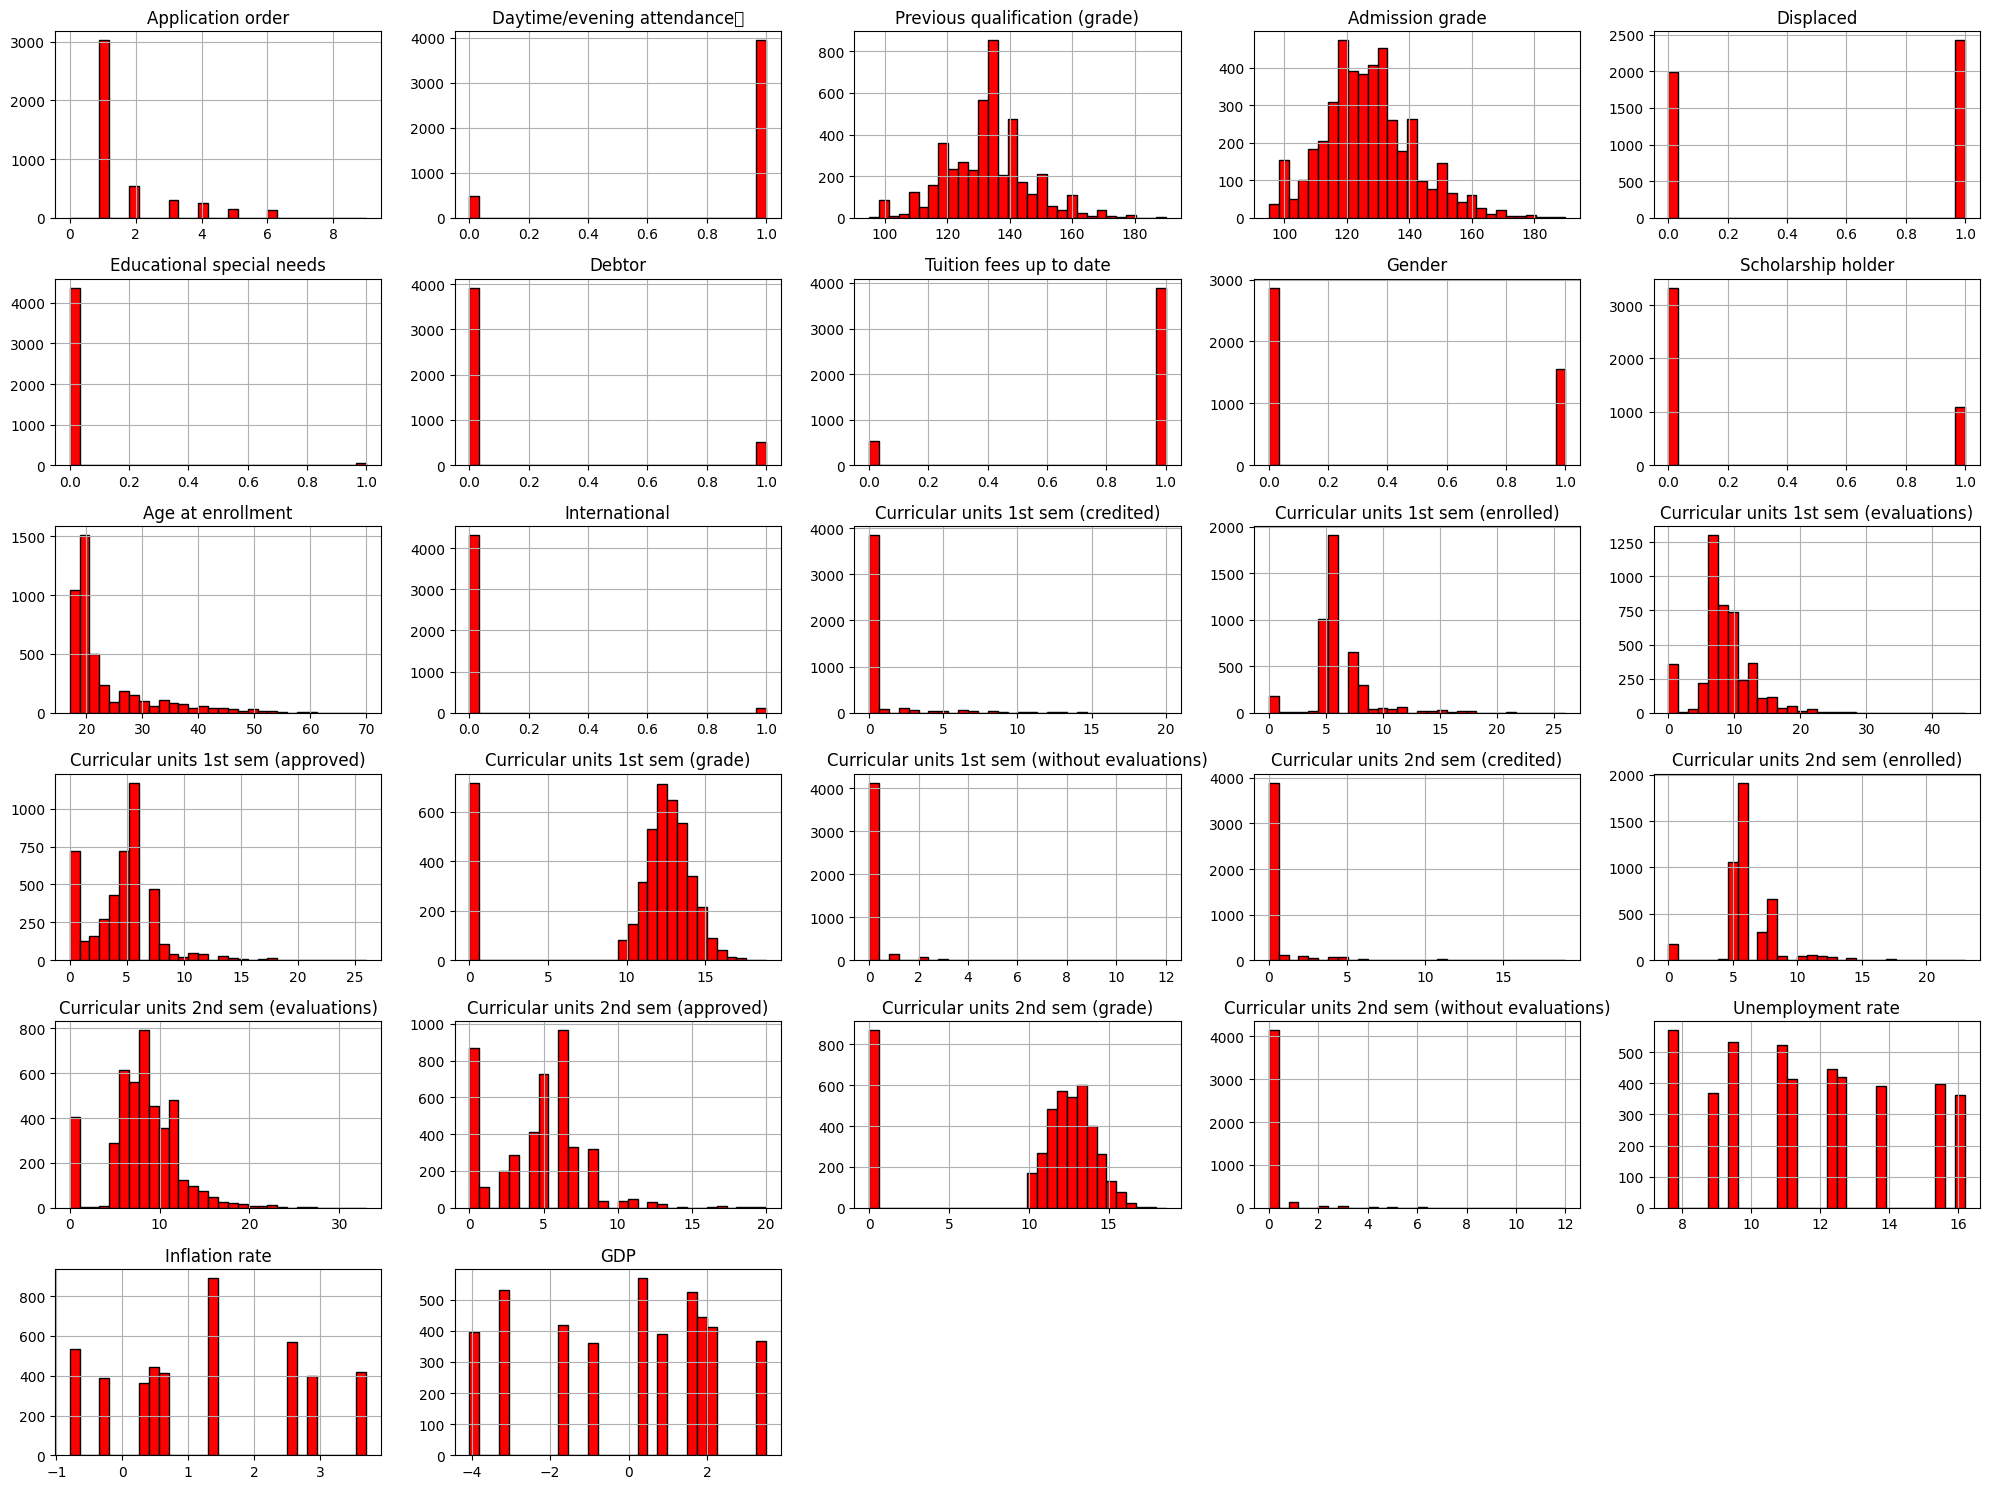

In [21]:
df.hist(
    bins=30,             
    figsize=(20, 15),     
    edgecolor='black',   
    color='red'       
)

plt.tight_layout()
plt.show()

Boxplot para algunas de las variables numéricas

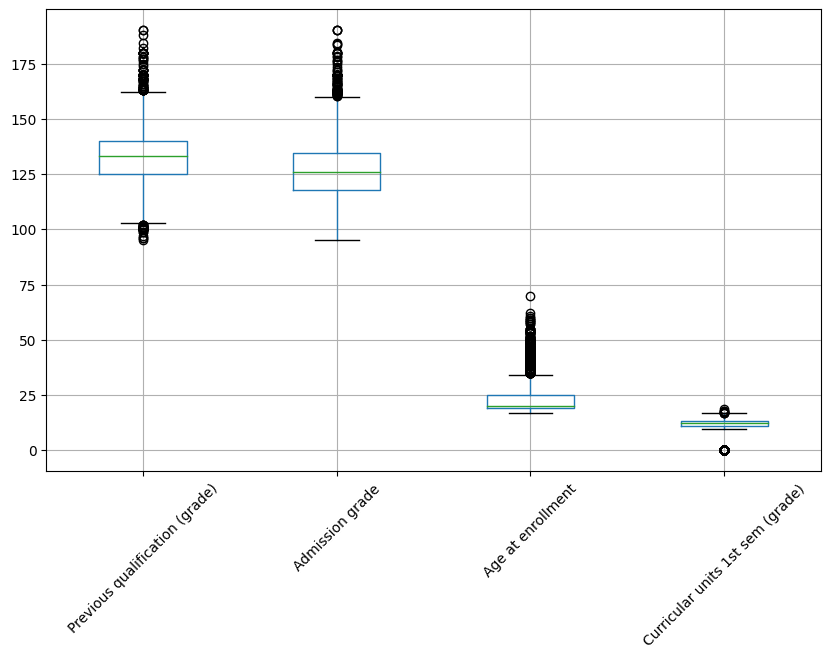

In [22]:
plt.figure(figsize=(10, 6))
df[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (grade)']].boxplot()
plt.xticks(rotation=45)
plt.show()

<AxesSubplot: >

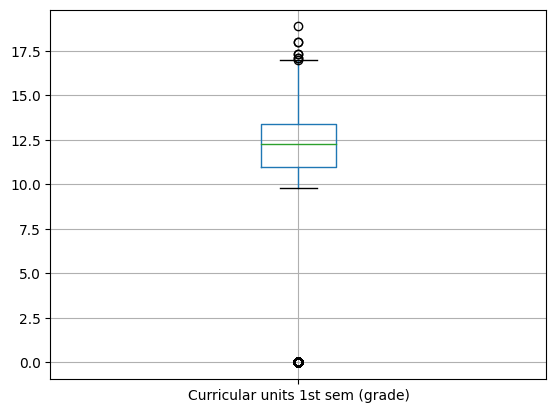

In [23]:
df[['Curricular units 1st sem (grade)']].boxplot()

Se realiza un Data Profilling para obtener la información acerca de las variables de una manera más concentrada

In [24]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.2/444.2 kB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 34.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 124.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 133.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 53.3 MB/s et

In [25]:
from ydata_profiling import ProfileReport

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
#pip install y-data-sdk

In [27]:
!pip install ipywidgets==8.1.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 122.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [28]:
profile_data=ProfileReport(df, minimal=True) # minimal=True
profile_data

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Del Data Profiling obtenemos alertas de presencia de ceros en varias variables, pero esto no presenta una situación desfavorable, ya que algunas de las variables que no representan códigos o puntajes ya se encuentran con dummies.

In [29]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]


Debido a que el dataset utilizado ya tuvo un preprocesamiento de datos por lo manifestado en la página de su obtención, la cantidad de ceros no nos indican una situación a preocuparnos, ya que las variables predictoras son binarias debido al proceso de dummies.

Aunque ya se puede visualizar en el Data Profiling, se consulta la rata de "Target"

In [30]:
# Análisis de balanceo
target_distribution = df['Target'].value_counts()
target_percentage = df['Target'].value_counts(normalize=True) * 100

print("📊 DISTRIBUCIÓN DE DESERCIÓN:")
print(f"   • No desertó: {target_distribution['No desertó']:,} ({target_percentage['No desertó']:.1f}%)")
print(f"   • Desertó: {target_distribution['Desertó']:,} ({target_percentage['Desertó']:.1f}%)")
print(f"   • Ratio deserción: 1:{target_distribution['No desertó']/target_distribution['Desertó']:.1f}")

📊 DISTRIBUCIÓN DE DESERCIÓN:
   • No desertó: 3,003 (67.9%)
   • Desertó: 1,421 (32.1%)
   • Ratio deserción: 1:2.1


### 1.4 Limpieza de datos atípicos

Para realizar la limpieza de datos atípicos se consulta en la página de donde se obtuvo el dataframe las reglas de calidad de cada variable, de las cuales se encuentran solamente para cuatro variables numéricas

Previous qualification (grade) -> (between 0 and 200)
Admission grade -> (between 0 and 200)
Curricular units 1st sem (grade) -> (between 0 and 20)
Curricular units 2nd sem (grade) -> (between 0 and 20)

Por lo que se procede a revisar si existen valores que incumplen sus respectivas normas, mediante boxplots y consultando si existen valores que no se encuentren en estos rangos.

<AxesSubplot: >

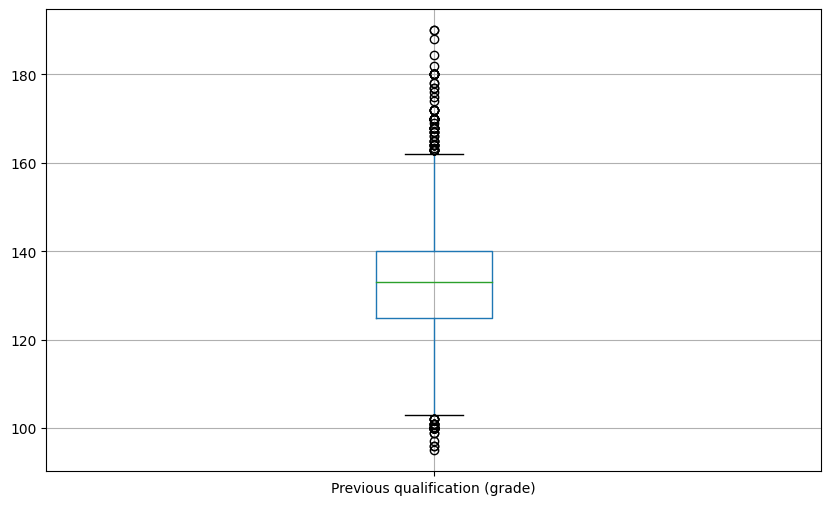

In [31]:
plt.figure(figsize=(10, 6))
df[['Previous qualification (grade)']].boxplot()

<AxesSubplot: >

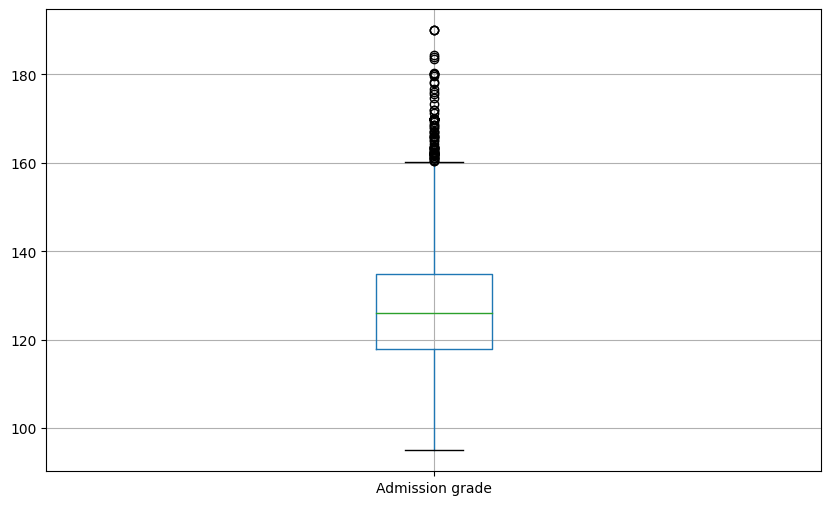

In [32]:
plt.figure(figsize=(10, 6))
df[['Admission grade']].boxplot()

<AxesSubplot: >

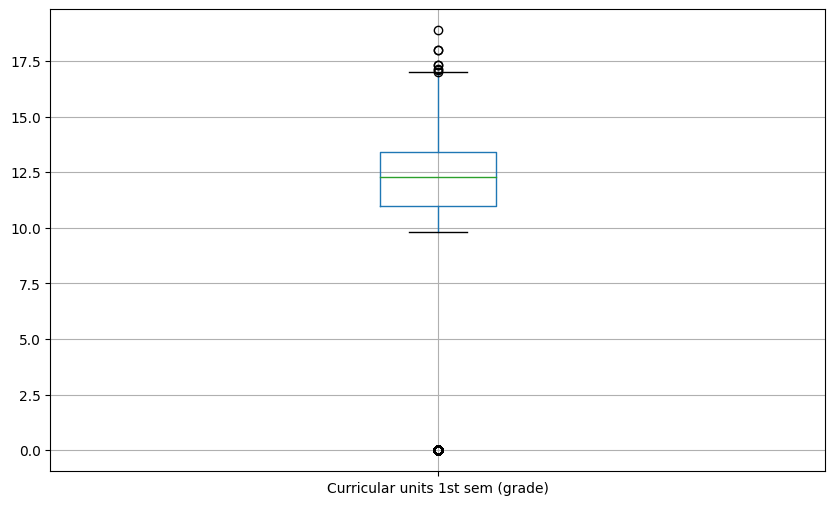

In [33]:
plt.figure(figsize=(10, 6))
df[['Curricular units 1st sem (grade)']].boxplot()

<AxesSubplot: >

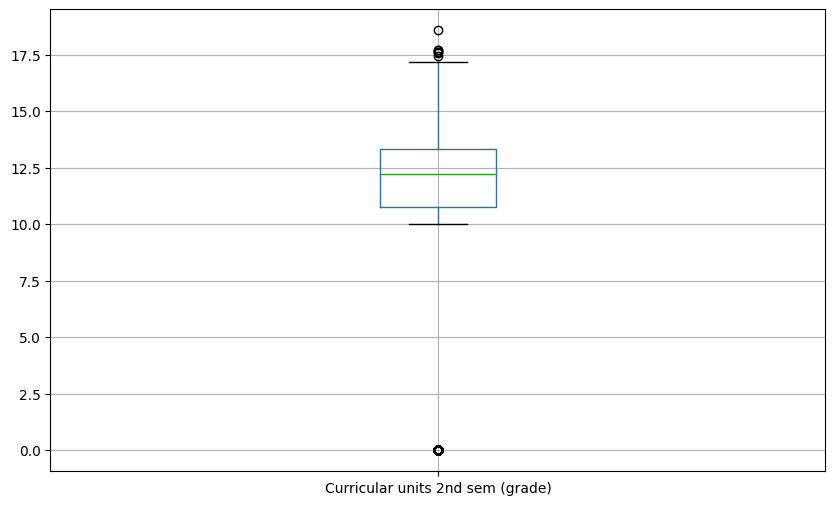

In [34]:
plt.figure(figsize=(10, 6))
df[['Curricular units 2nd sem (grade)']].boxplot()

In [35]:
# Valores fuera del rango para "Previous qualification (grade)"
fuera_rango_1 = df.loc[(df['Previous qualification (grade)'] < 0) | 
                       (df['Previous qualification (grade)'] > 200)]

# Valores fuera del rango para "Admission grade"
fuera_rango_2 = df.loc[(df['Admission grade'] < 0) | 
                       (df['Admission grade'] > 200)]

# Valores fuera del rango para "Curricular units 1st sem (grade)"
fuera_rango_3 = df.loc[(df['Curricular units 1st sem (grade)'] < 0) | 
                       (df['Curricular units 1st sem (grade)'] > 20)]

# Valores fuera del rango para "Curricular units 2nd sem (grade)"
fuera_rango_4 = df.loc[(df['Curricular units 2nd sem (grade)'] < 0) | 
                       (df['Curricular units 2nd sem (grade)'] > 20)]

In [36]:
print("Fuera de rango - Previous qualification (grade):", len(fuera_rango_1))
print("Fuera de rango - Admission grade:", len(fuera_rango_2))
print("Fuera de rango - 1st sem grade:", len(fuera_rango_3))
print("Fuera de rango - 2nd sem grade:", len(fuera_rango_4))

Fuera de rango - Previous qualification (grade): 0
Fuera de rango - Admission grade: 0
Fuera de rango - 1st sem grade: 0
Fuera de rango - 2nd sem grade: 0


Se puede evidenciar tanto por diagramas de cajas y bigotes, como por valores fuera del rango que los datos considerados outliers cumplen con las reglas de calidad que se conocen, por lo que no se deben eliminar.

### 1.5  Limpieza de datos nulos: Imputación

Estrategia:
* Eliminar registros con mas de 30% de nulos.
* Eliminar columnas con mas de 15%-20% de nulos.
* Imputar por media, moda, mediana, vecinos cercanos. No se puede imputar más allá del 15%-20% de los datos. 
* Para casos especiales se crea modelo predictivo.


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application mode                                4424 non-null   category
 2   Application order                               4424 non-null   int64   
 3   Course                                          4424 non-null   category
 4   Daytime/evening attendance	                     4424 non-null   int64   
 5   Previous qualification                          4424 non-null   category
 6   Previous qualification (grade)                  4424 non-null   float64 
 7   Nacionality                                     4424 non-null   category
 8   Mother's qualification                          4424 non-null   category
 9   Father's qualification        

No se presentan datos nulos debido a que el dataset ya ha sido sometido a preprocesamiento. Pero si fuese necesario, se imputarían por su promedio, que no altera la media muestral; o por otras imputaciones más detalladas como imputación por valor anterior o siguiente, o por vecinos más cercanos.

Explicación sobre el pre-procesamiento de datos presente en la página donde se extrajeron los datos:

<img src="image-20250505-214123.png" width="" align="" />

### 1.6 Creación de nuevas variables

Se analiza la creación de variables que evidencien el cambio respecto a los créditos entre primer y segundo semestre, ya que puede ser útil para capturar patrones de mejora o deterioro académico.

In [38]:
"""# 1. Progresión en créditos convalidados
df['Progression_credited'] = (df['Curricular units 2nd sem (credited)'] - 
                             df['Curricular units 1st sem (credited)'])

# 2. Progresión en créditos matriculadas
df['Progression_enrolled'] = (df['Curricular units 2nd sem (enrolled)'] - 
                             df['Curricular units 1st sem (enrolled)'])

# 3. Progresión en créditos aprobados
df['Progression_approved'] = (df['Curricular units 2nd sem (approved)'] - 
                             df['Curricular units 1st sem (approved)'])

# Análisis descriptivo de las nuevas variables
print("ANÁLISIS DESCRIPTIVO DE LAS NUEVAS VARIABLES")

progression_vars = ['Progression_credited', 'Progression_enrolled', 'Progression_approved']

for var in progression_vars:
    print(f"\n {var}:")
    print(f"   • Media: {df[var].mean():.3f}")
    print(f"   • Mediana: {df[var].median():.3f}")
    print(f"   • Desviación estándar: {df[var].std():.3f}")
    print(f"   • Mínimo: {df[var].min()}")
    print(f"   • Máximo: {df[var].max()}")
    
# Análisis de correlación con la variable objetivo
print("\n CORRELACIÓN CON LA VARIABLE OBJETIVO")

# Codificación temporal de target para análisis de correlación
if df['Target'].dtype.name == 'category':
    target_temp = df['Target'].map({'Desertó': 1, 'No desertó': 0})
        
    for var in progression_vars:
        correlation = df[var].corr(target_temp)
        print(f"Correlación {var} con Target: {correlation:.4f}")
            
        # Interpretación de la correlación
        if abs(correlation) > 0.1:
            strength = "fuerte"
        elif abs(correlation) > 0.01:
            strength = "moderada"
        else:
            strength = "débil"
                
        direction = "negativa" if correlation < 0 else "positiva"
        print(f"   -> Correlación {strength} {direction}")"""

'# 1. Progresión en créditos convalidados\ndf[\'Progression_credited\'] = (df[\'Curricular units 2nd sem (credited)\'] - \n                             df[\'Curricular units 1st sem (credited)\'])\n\n# 2. Progresión en créditos matriculadas\ndf[\'Progression_enrolled\'] = (df[\'Curricular units 2nd sem (enrolled)\'] - \n                             df[\'Curricular units 1st sem (enrolled)\'])\n\n# 3. Progresión en créditos aprobados\ndf[\'Progression_approved\'] = (df[\'Curricular units 2nd sem (approved)\'] - \n                             df[\'Curricular units 1st sem (approved)\'])\n\n# Análisis descriptivo de las nuevas variables\nprint("ANÁLISIS DESCRIPTIVO DE LAS NUEVAS VARIABLES")\n\nprogression_vars = [\'Progression_credited\', \'Progression_enrolled\', \'Progression_approved\']\n\nfor var in progression_vars:\n    print(f"\n {var}:")\n    print(f"   • Media: {df[var].mean():.3f}")\n    print(f"   • Mediana: {df[var].median():.3f}")\n    print(f"   • Desviación estándar: {df[va

<img src="image-20250524-220402.png" width="" align="" />

Dado que, mediante el análisis de correlaciones para irrelevancia, Progression_credited y Progression_enrolled se eliminarían, ya que están por debajo del umbral de 0.01. Se decide no continuar con estas variables progresivas

### 1.7 Análisis de correlaciones

Correlaciones entre variables predictoras y correlaciones entre variables de entrada y salida

Se realizó un análisis de correlación entre las variables del conjunto de datos y la variable objetivo con el fin de seleccionar aquellas que aportan mayor información para la predicción. El criterio utilizado para eliminar variables fue el siguiente:

- Alta correlación entre pares de variables: En los casos en que dos variables estaban altamente correlacionadas entre sí (correlación ≥ 0.8), se eliminó la variable que tenía menor correlación con la variable objetivo para evitar redundancia e introducir colinealidad en el modelo.

- Baja correlación con la variable objetivo: Se eliminaron las variables cuya correlación absoluta con la variable objetivo era menor a 0.01, ya que no aportan significativamente a la predicción.

In [39]:
df_correlacion=df.copy()

In [40]:
df['Target'].unique()

['Desertó', 'No desertó']
Categories (2, object): ['Desertó', 'No desertó']

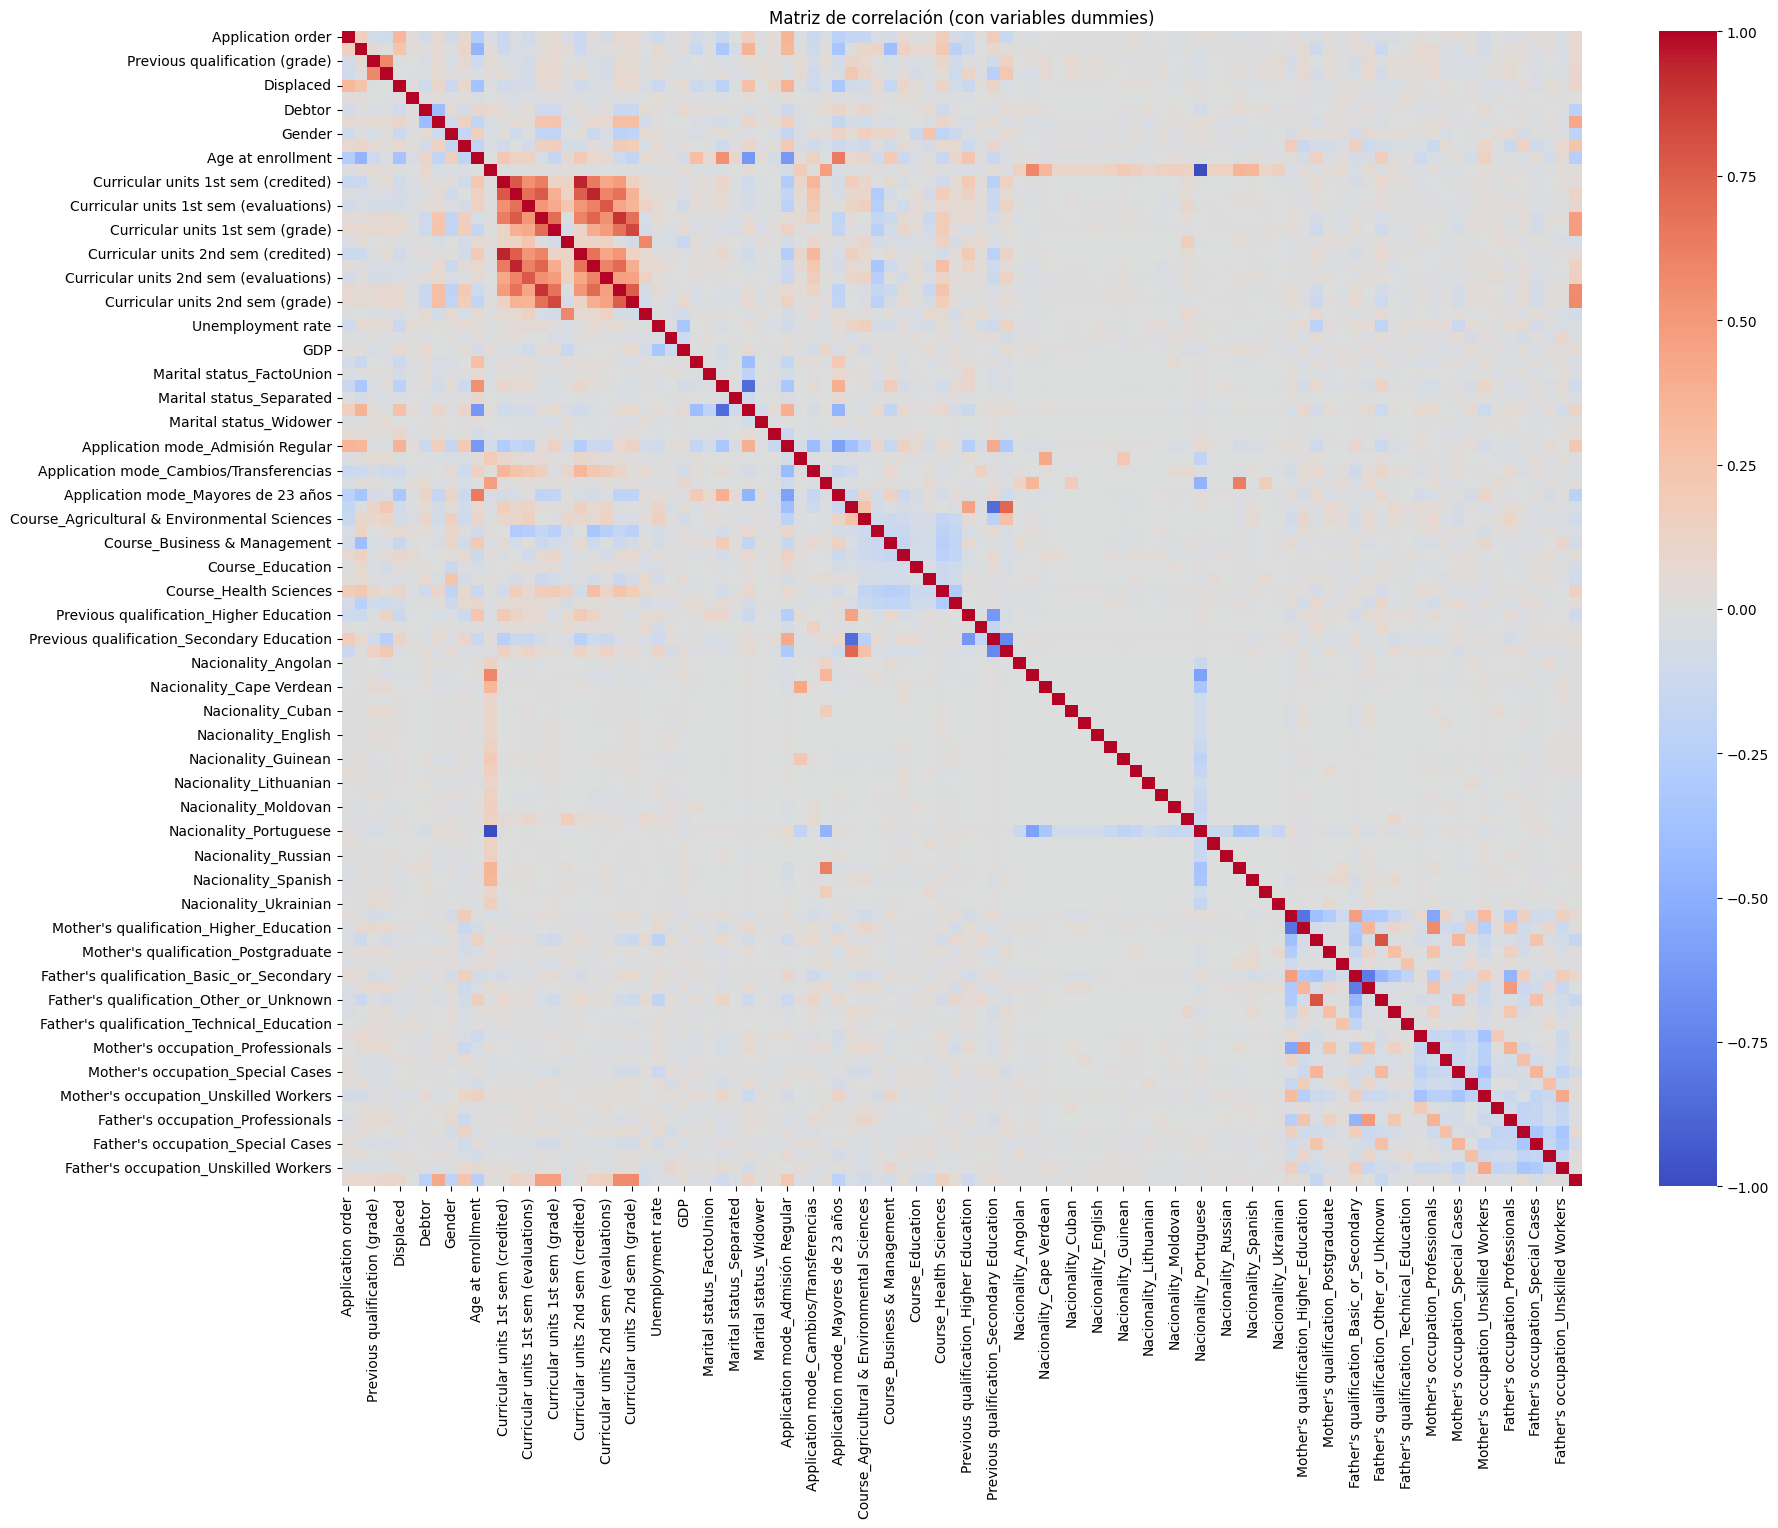

In [41]:
from sklearn.preprocessing import LabelEncoder

# 1. Aplicar LabelEncoder SOLO a la columna 'Target'
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])  # 0 y 1

# 2. Guardar aparte la columna codificada de Target
target_encoded = df['Target']

# 3. Aplicar get_dummies al resto del DataFrame
df = pd.get_dummies(df.drop(columns='Target'), drop_first=False)

# 4. Volver a incluir la columna Target codificada
df['Target'] = target_encoded

# 4. Calcular matriz de correlación
correlation_matrix = df.corr()

# 5. Visualizar
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de correlación (con variables dummies)")
plt.show()

Exportación a Excel para una mejor visualización de la matriz de 37x37

<img src="image-20250508-214414.png" width="" align="" />

Para tomar la decisión de eliminar variables con baja correlación con la variable objetivo se toma un valor extremo de 0.01 ya que existen estudios realizados anteriormente sobre factores/variables que influyen en la deserción educativa, por lo que tomar el valor predeterminado  0.1 podría causar que no se analicen relaciones importantes. Por ejemplo, el nivel de estudio de los padres, que inicialmente no demostraba una buena correlación, ya ha sido estudiada en algunos artículos:

"Factores socioeconómicos que con mayor frecuencia se han presentado en los diferentes casos, como la carencia de fuentes de financiamiento para continuar sus estudios, ya sea de la universidad o de entidades financieras, las deficientes bases económicas de la familia y la incompatibilidad laboral, proporcionan otro elemento significativo frente a las decisiones que toman los alumnos." 

Gasca, S. M. A., & Arias, D. A. M. (2009). Factores intervinientes en la deserción escolar de la Facultad de Psicología, Fundación Universitaria Los Libertadores. Tesis Psicológica, (4), 72-85. 

"Por su parte, la creciente vulnerabilidad socioeconómica se ve reflejada tanto en el nivel de ingresos familiares reportado por los nuevos estudiantes, como en la proporción de jóvenes que se encontraban trabajando al momento de presentar el Examen de Estado para Ingreso a la Educación Superior del ICFES, y el tipo de propiedad de la vivienda. El nivel educativo de la madre también ilustra una recomposición importante en este sentido (...). Se observa con claridad una correlación directa entre mayores ingresos y resultados académicos."

Guzmán Ruíz Carolina, et al. (2009). Deserción estudiantil en la educación superior colombiana: Metodología de seguimiento, diagnóstico y elementos para su prevención, Ministerio de Educación Nacional. (62-63)

In [42]:
target = 'Target'  

# Listar variables predictoras (sin incluir el target)
predictors = [col for col in correlation_matrix.columns if col != target]

#  Verificar alta correlación entre variables predictoras
threshold_corr = 0.8
print("Variables con alta correlación entre sí (> 0.8):")
for i in range(len(predictors)):
    for j in range(i + 1, len(predictors)):
        var1 = predictors[i]
        var2 = predictors[j]
        corr_value = correlation_matrix.loc[var1, var2]
        if abs(corr_value) > threshold_corr:
            print(f" - {var1} y {var2} tienen correlación {corr_value:.2f}, considerar eliminar una.")

#  Verificar baja correlación con el target
threshold_target = 0.01
print("\nVariables con baja correlación con el target (< 0.01):")
for var in predictors:
    corr_with_target = abs(correlation_matrix.loc[var, target])
    if corr_with_target < threshold_target:
        print(f" - {var} tiene correlación {corr_with_target:.2f} con el target, considerar eliminarla.")

Variables con alta correlación entre sí (> 0.8):
 - International y Nacionality_Portuguese tienen correlación -1.00, considerar eliminar una.
 - Curricular units 1st sem (credited) y Curricular units 2nd sem (credited) tienen correlación 0.94, considerar eliminar una.
 - Curricular units 1st sem (enrolled) y Curricular units 2nd sem (enrolled) tienen correlación 0.94, considerar eliminar una.
 - Curricular units 1st sem (approved) y Curricular units 2nd sem (approved) tienen correlación 0.90, considerar eliminar una.
 - Curricular units 1st sem (grade) y Curricular units 2nd sem (grade) tienen correlación 0.84, considerar eliminar una.
 - Marital status_Married y Marital status_Single tienen correlación -0.85, considerar eliminar una.
 - Application mode_Titulados/Diplomados y Previous qualification_Secondary Education tienen correlación -0.85, considerar eliminar una.
 - Mother's qualification_Basic_or_Secondary y Mother's qualification_Higher_Education tienen correlación -0.82, consi

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Application order                                        4424 non-null   int64  
 1   Daytime/evening attendance	                              4424 non-null   int64  
 2   Previous qualification (grade)                           4424 non-null   float64
 3   Admission grade                                          4424 non-null   float64
 4   Displaced                                                4424 non-null   int64  
 5   Educational special needs                                4424 non-null   int64  
 6   Debtor                                                   4424 non-null   int64  
 7   Tuition fees up to date                                  4424 non-null   int64  
 8   Gender                      

- Mother's occupation y Father's occupation tienen alta correlación entre sí y tienen la misma correlación con la objetivo, por lo que se puede eliminar cualquiera de las dos. Se elimina Father's occupation

- Curricular units 1st sem (credited) y Curricular units 2nd sem (credited) tienen baja correlación con la variable objetivo, -0,029 y  -0,033 respectivamente, a su vez tienen una alta correlación (0.94) entre ellas. Se mantiene Curricular units 2st sem (credited) se deja esa

- Curricular units 1st sem (enrolled) y Curricular units 2nd sem (enrolled) tienen correlación 0.94. Con la variable target, Curricular units 1st sem (enrolled) tiene una baja correlación -0,12 y Curricular units 2nd sem (enrolled) -0,141514926. Se elimina Curricular units 1st sem (enrolled)

- Curricular units 1st sem (approved) y Curricular units 2nd sem (approved) tienen alta correlación (0.90). Con la variable target, Curricular units 1st sem (approved) -0,479112034 y Curricular units 2nd sem (approved) -0,569500244. Se elimina Curricular units 1st sem (approved)


- Curricular units 1st sem (grade) y Curricular units 2nd sem (grade) tienen correlación 0.84. Con la variable de salida -0,480669065 y  -0,571792203, por tanto se elimina Curricular units 1st sem (grade)


- International(0,0103596549088543) con target y Nacionality_Portuguese -0,0103596549088547, se elimina International

- Marital status_Married y Marital status_Single tienen correlación alta -0.85. Con la variable objetivo tienen -0,0990478494184202 0,113858754518879 respectivamente. Se elimina Marital status_Married

- Application mode_Titulados/Diplomados tiene correlación -0,047451611988853 con 'target' y Previous qualification_Secondary Education 0,064781704240618. Entre ambas variables hay correlación de -0.85. Se elimina Application mode_Titulados/Diplomados

- Mother's qualification_Basic_or_Secondary tiene correlación 0,0563642174849397 con 'target', Mother's qualification_Higher_Education 0,0121123249505718. Entre ambas variables hay correlación de -0.82. Se elimina Mother's qualification_Higher_Education

In [44]:
!pip install openpyxl==3.1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 27.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [45]:
import os

directory = "output_files"
os.makedirs(directory, exist_ok=True)

file_path = os.path.join(directory, "correlation_with_desercion.xlsx")
correlation_matrix.to_excel(file_path)

print(f"Correlation matrix saved to {file_path}")

Correlation matrix saved to output_files/correlation_with_desercion.xlsx


Con base en este análisis, se eliminaron las siguientes variables:

In [46]:
columnas_a_eliminar = [
    "International",
    "Marital status_Married",
    "Application mode_Titulados/Diplomados",
    "Mother's qualification_Higher_Education",
    "Educational special needs",
    "Marital status_Widower",
    "Nacionality_Angolan",
    "Nacionality_Brazilian",
    "Nacionality_Cape Verdean",
    "Nacionality_Guinean",
    "Nacionality_Mexican",
    "Nacionality_Russian",
    "Nacionality_Spanish",
    "Nacionality_Ukrainian",
    "Father's qualification_Higher_Education",
    "Father's qualification_Technical_Education",
    "Mother's occupation_Professionals",
    'Curricular units 1st sem (credited)',    
    'Curricular units 1st sem (enrolled)',    
    'Curricular units 1st sem (approved)',    
    'Curricular units 1st sem (grade)',
    "Father's occupation_Unskilled Workers"

]
df.columns = df.columns.str.strip()

df.drop(columns=columnas_a_eliminar, axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Application order                                        4424 non-null   int64  
 1   Daytime/evening attendance                               4424 non-null   int64  
 2   Previous qualification (grade)                           4424 non-null   float64
 3   Admission grade                                          4424 non-null   float64
 4   Displaced                                                4424 non-null   int64  
 5   Debtor                                                   4424 non-null   int64  
 6   Tuition fees up to date                                  4424 non-null   int64  
 7   Gender                                                   4424 non-null   int64  
 8   Scholarship holder          

### 1.8 Reducción de dimensionalidad

Para el caso del presente proyecto, se exponen algunas razones por las cuales no se aplicó PCA: 

- Pérdida de la interpretabilidad, en un caso como la deserción estudiantil, es importante entender qué factores específicos influyen en la deserción, y mediante políticas institucionales, educadores y administradores requieren identificar variables concretas. 

- El dataset tiene una naturaleza de variables mixtas: variables categóricas (estado civil, nacionalidad, ocupación de padres), variables numéricas (calificaciones, edad, tasas económicas) 

- Ya se ha realizado un análisis de correlaciones para redundancia e irrelevancia, por lo que se ha solucionado el problema de multicolinealidad. 

### 1.9 Balanceo y transformaciones

El balanceo y la ingeniería de características es realizada en el notebook de los modelos debido a la diferencia en los requerimientos.

In [48]:
df.to_csv('desercion_preparado.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ef7c6378-2156-4a8c-80f7-71946664b1f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>